### Artem Moskalev

In [1]:
import numpy as np
import scipy

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import skimage.io

In [3]:
def show_images(input_image, input_title, output_image, output_title, cmap=None):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 35))
    
    ax1.imshow(input_image, cmap=cmap)
    ax1.set_title(input_title)
    
    ax2.imshow(output_image, cmap=cmap)
    ax2.set_title(output_title)

# QR Code

The goal of this homework is to use Fourier transformations as well as denoising and sharpering techniques to recover original image.

We have QR code image, which is distorted to much to read it using phones.

You will try to recover it

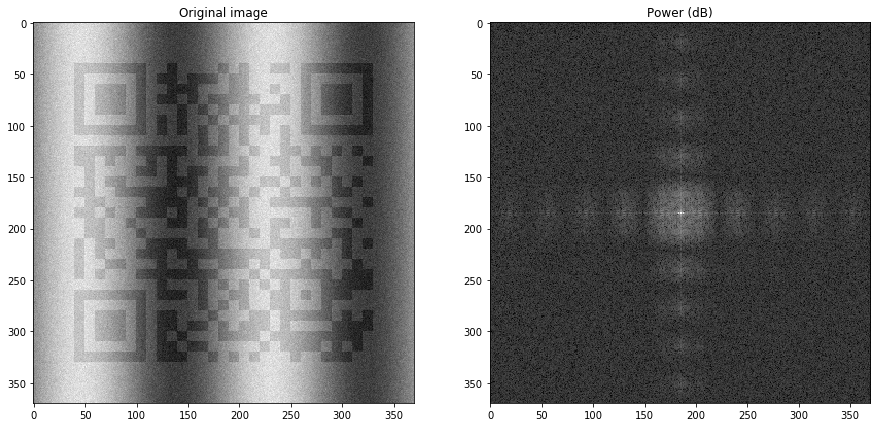

In [4]:
real_img = skimage.io.imread('qr_code.png')
real_img = skimage.img_as_float(real_img)

img = np.fft.fft2(real_img)
mag = np.abs(np.fft.fftshift(img))

show_images(real_img, 'Original image', 20*np.log10(mag**2 + 1), 'Power (dB)', cmap='gray')

(1) Note that image distorted with noise. In this case we suggest you to make an assumption that noise consists of gaussian noise and some periodic structure. Using boundaries above QR code plot first line of an image as 1d graph. This is noise we need to deal with.

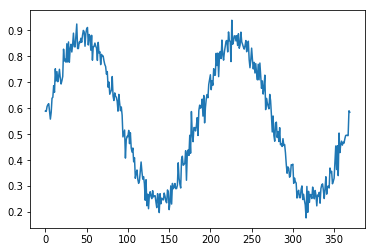

In [5]:
line = real_img[0,:].copy()
plt.plot(line);

(2) Substruct it from the image and look if it helps? Replicate first line to fit image size.
Use np.repeat function

In [6]:
l = np.repeat(line, repeats=real_img.shape[0])
l = l.reshape(real_img.shape).T

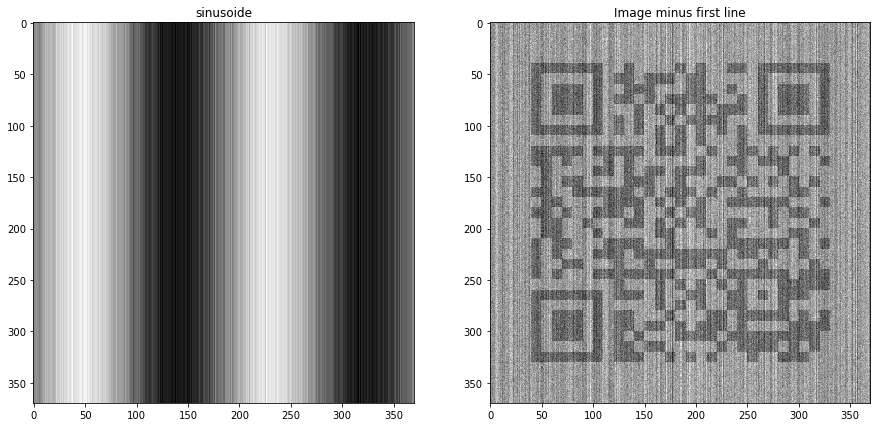

In [7]:
show_images(l, 'sinusoide', real_img - l, 'Image minus first line', cmap='gray')

(3) It should look a bit better, but still to much noise there. It seems that we added more noise by substructing with a noisy sinusoide. Create a sinosuide with same amplitute and frequency. It may be a good idea to look at it in Fourier domain.

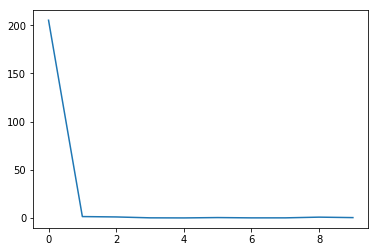

In [8]:
line_fft = np.fft.fft(line)
plt.plot(np.real(line_fft[:10]));

In [9]:
line_fft[4:] = 0

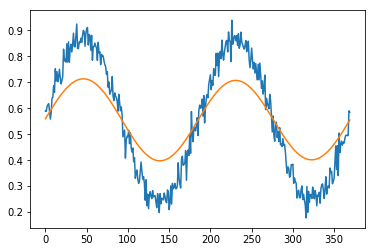

In [10]:
inv = np.fft.ifft(line_fft)
inv = np.real(inv)
plt.plot(line)
plt.plot(inv);

In [11]:
med = np.median(inv)
qu = np.floor((line.max()+med)/(inv.max()))
qu # scaling quotient

2.0

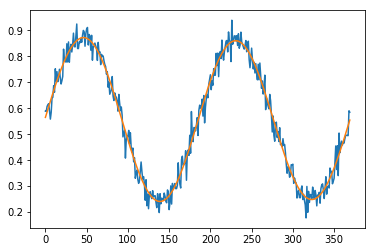

In [12]:
inv_ = qu*inv-med
plt.plot(line)
plt.plot(inv_);

In [13]:
l = np.repeat(inv_, repeats=real_img.shape[0])
l = l.reshape(real_img.shape).T
filtered = real_img-l

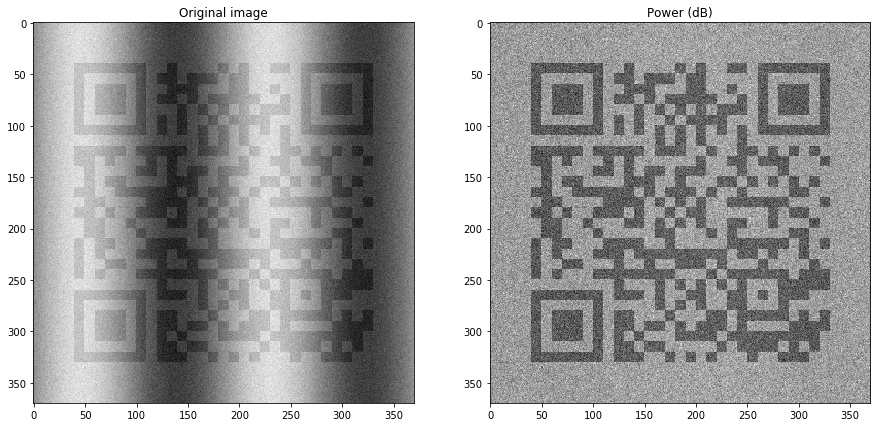

In [14]:
show_images(real_img, 'Original image', filtered, 'Power (dB)', cmap='gray')

(4) Ok, it seems much better now. Try to remove rest of the noise. Use gaussian filter. Play with parameters in order to get better results.

In [15]:
from skimage.filters import gaussian

In [16]:
filtered = gaussian(filtered, sigma=1.3)

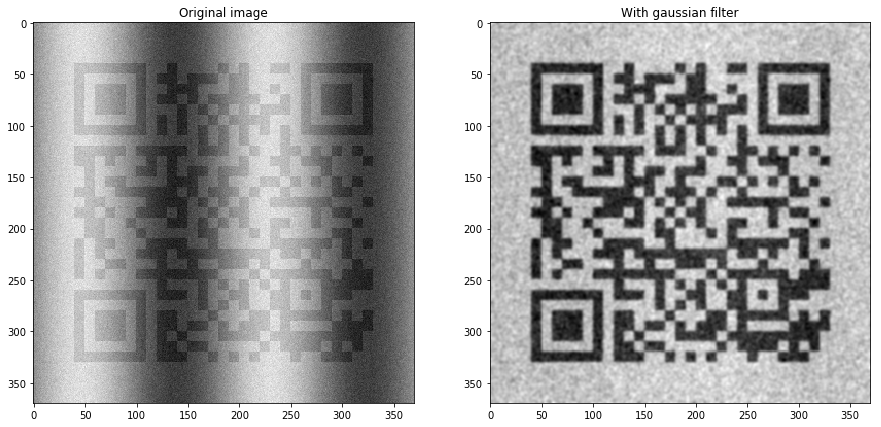

In [17]:
show_images(real_img, 'Original image', filtered, 'With gaussian filter', cmap='gray')

(5) Make it sharper. Hint: use high-pass filter

In [18]:
from skimage.filters import laplace
from scipy.signal import convolve2d

In [19]:
#very simple 
sharpened1 = laplace(filtered)

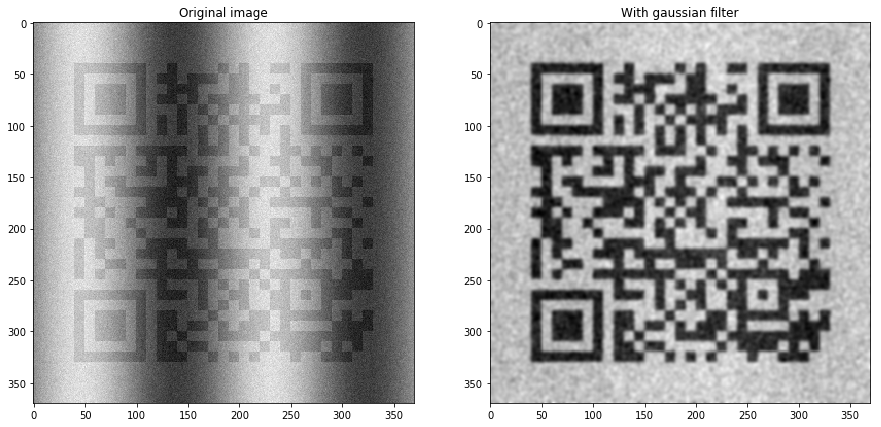

In [20]:
show_images(real_img, 'Original image', filtered-0.35*sharpened1, 'With gaussian filter', cmap='gray')

In [21]:
#second way works better
kernel = np.zeros((3,3))
kernel[1,1] = 2.
kernel_avg = np.ones_like(kernel)*(1/9)
kernel = kernel - kernel_avg
sharpened2 = convolve2d(filtered, kernel)

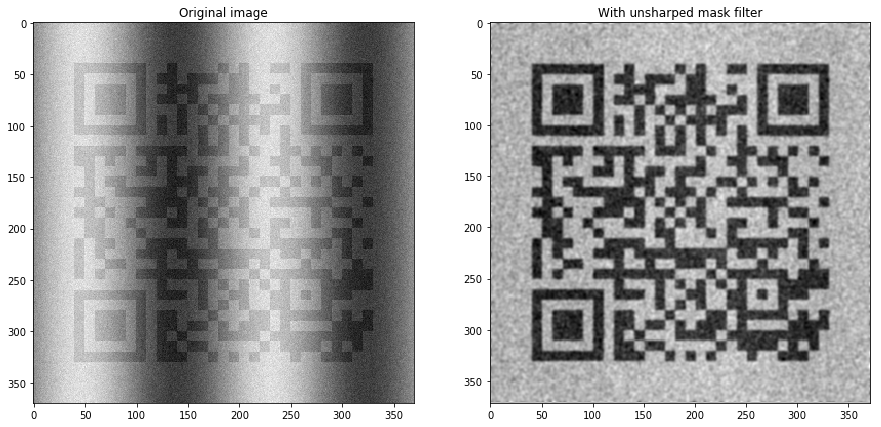

In [22]:
show_images(real_img, 'Original image', sharpened2, 'With unsharped mask filter', cmap='gray')

(6) Ok, almost done. Use np.round function to get the result. Note that your image at this point should be distibuted from 0 to 1.

In [23]:
from skimage import img_as_float

In [24]:
img = img_as_float(sharpened2)
rounded = np.round(img, decimals=1)

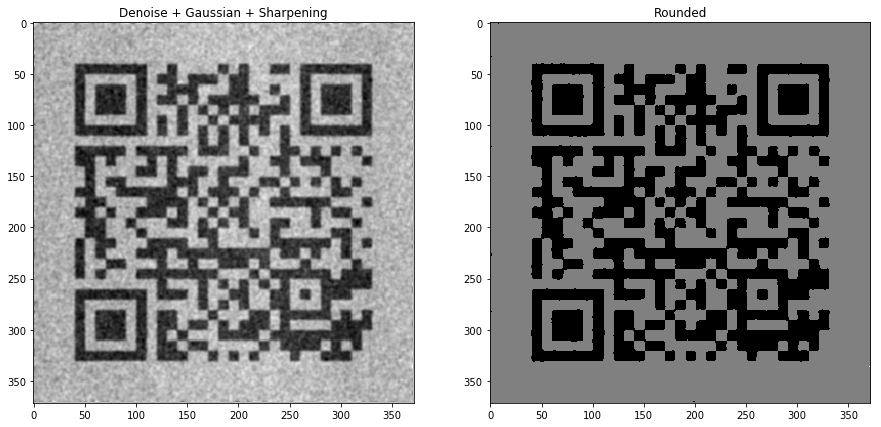

In [25]:
show_images(img, 'Denoise + Gaussian + Sharpening', rounded, 'Rounded', cmap='gray')

(7) Can your phone read it now?

###### It can. Cheers.